In [1]:
import os
import myfunc
import numpy as np
from glob import glob
from astropy.table import Table

from cluster_simulation import Cluster, ClusterMESA, ClusterISO



In [2]:
thres = 0.5
cluster_member = Table.read("/home/ivan22/spin/resources/open_cluster_member_v8.fits", format="fits")
cluster_member = cluster_member[np.where((cluster_member['Proba'] > thres))]
cluster_member = cluster_member[np.where(cluster_member['isbinary']==0)[0]]
cluster_lamost_member = Table.read("/home/ivan22/spin/resources/wyh_v5.fits", format="fits")
cluster_lamost_member = cluster_lamost_member[np.where((cluster_lamost_member['Proba'] > thres))]
cluster_lamost_member = cluster_lamost_member[np.where(cluster_lamost_member['isbinary']==0)[0]]
cluster_lamost_member_mrs = Table.read("/home/ivan22/spin/resources/wyh_mrs_v4.fits", format="fits")
cluster_lamost_member_afgk = Table.read("/home/ivan22/spin/resources/wyh_afgk_v4.fits", format="fits")

count = myfunc.count_element(cluster_lamost_member['Cluster'])
valid_cluster = [(c,n) for c,n in count if n > 30]
final_cluster = np.load("/home/ivan22/spin/resources/final_final_cluster.npz")['cluster']


Min count: 1
Max count: 530
Mean count: 17.325581395348838
Total count: 430


In [3]:
c = 'NGC_1912'
cluster_data=cluster_member[np.where(cluster_member['Cluster']==c)[0]]
lamost_data=cluster_lamost_member[np.where(cluster_lamost_member['Cluster']==c)[0]]

cluster = Cluster(
    cluster_id=c,
    cluster_data=cluster_data,
    lamost_data=lamost_data
)


Cluster Name: NGC_1912           
Cluster Member: 438           
Cluster Member with Vsini: 80           
Cluster Age: 316


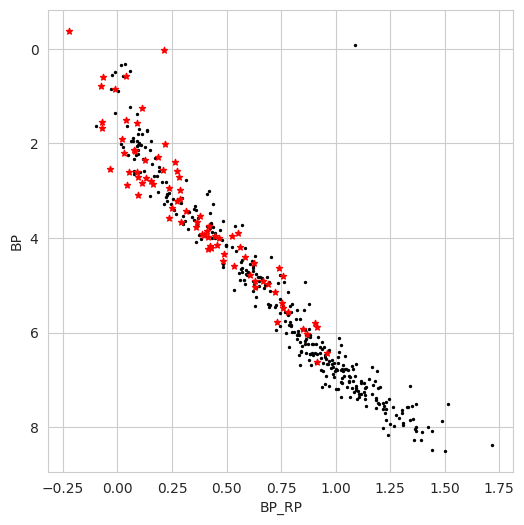

In [4]:
cluster.plot_cmd()

2024-07-03 07:53:13.862 | INFO     | cluster_simulation:_cluster_param_mapper:122 - Demonstrate the distribution of wi


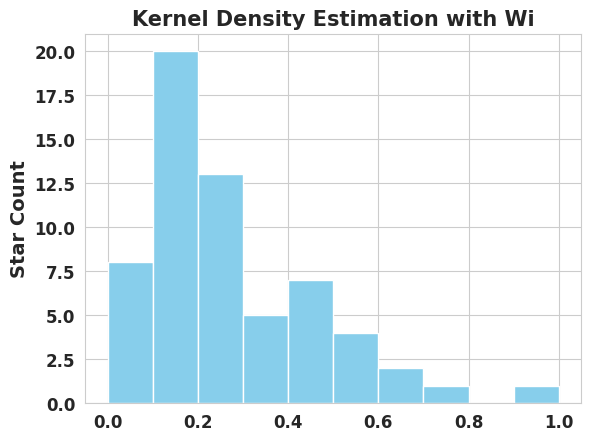

In [5]:
cluster.plot_param_distrb(param='wi')

In [6]:

def get_all_files(c):
    return sorted(glob(os.path.join(f"/home/ivan22/MESA/outputs/{c.replace('_', '').lower()}", \
                                        f'**/*.data'), recursive=True)) 
mesa_file_list = get_all_files(c)

In [9]:
for mesa_file in mesa_file_list:
    mesa = ClusterMESA(
        cluster_id=c,
        age=lamost_data['age'][0],
        mesafile=mesa_file
    )
    mesa.plot_fit_eep()


AttributeError: 'ClusterMESA' object has no attribute 'find_nearest_age'